In [2]:
from PIL import Image
import numpy as np

##### chair의 이미지 해상도를 통일하여 적용하기 : Test

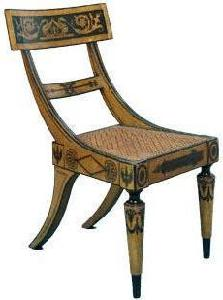

In [2]:
# chair의 1번 이미지
img = Image.open("../Data/chair/image_0001.jpg")
img

In [3]:
# 배열 확인
np.array(img).shape

(300, 223, 3)

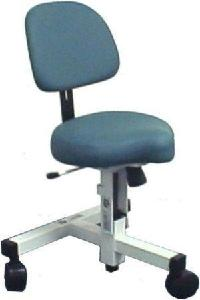

In [4]:
# chair의 2번 이미지
img = Image.open("../Data/chair/image_0002.jpg")
img

In [5]:
# 배열 확인
np.array(img).shape

(300, 200, 3)

> Image의 해상도가 일정하지 않음    
전체 이미지의 해상도의 최대값을 가지고 적용해보자!

##### chair의 전체이미지의 평균 해상도 구하기

In [5]:
import glob

In [6]:
widthRatio = []
heightRatio = []

for file in sorted(glob.glob("../Data/chair/*.jpg")):
    img = np.array(Image.open(file), dtype=np.int32)
    widthRatio.append(img.shape[1])
    heightRatio.append(img.shape[0])

In [8]:
print('chair의 너비 최대 해상도 :', np.mean(widthRatio))
print('chair의 높이 최대 해상도 :', np.mean(heightRatio))

chair의 너비 최대 해상도 : 229.65
chair의 높이 최대 해상도 : 297.31666666666666


> 너비 : 230, 높이 : 298으로 정함!

---
##### chair 이미지 해상도 변경 및 Gray Scale로 적용

In [ ]:
i = 1
for file in sorted(glob.glob("../Data/chair/*.jpg")):
    img = Image.open(file)
    imgResize = img.resize((230, 298), Image.Resampling.LANCZOS)
    imgResize = imgResize.convert('L')
    imgResize.save("../Data/chairNew/image_%04d.jpg"%i, "JPEG")
    i += 1

##### Laptop의 이미지 해상도 변경 및 GrayScale 적용

In [11]:
i = 1
for file in sorted(glob.glob("../Data/laptop/*.jpg")):
    img = Image.open(file)
    imgResize = img.resize((230, 298), Image.Resampling.LANCZOS)
    imgResize = imgResize.convert('L')
    imgResize.save("../Data/laptopNew/image_%04d.jpg"%i, "JPEG")
    i += 1

In [12]:
i = 1
for file in sorted(glob.glob("../Data/piano/*.jpg")):
    img = Image.open(file)
    imgResize = img.resize((230, 298), Image.Resampling.LANCZOS)
    imgResize = imgResize.convert('L')
    imgResize.save("../Data/pianoNew/image_%04d.jpg"%i, "JPEG")
    i += 1

#### chair Image를 Numpy로 변경하기

In [13]:
number_of_data = 60
img_width_size = 230
img_height_size = 298

In [17]:
chairData = np.zeros(
    number_of_data * img_width_size * img_height_size,
    dtype=np.int32
).reshape(
    number_of_data,
    img_height_size,
    img_width_size
)

In [18]:
pianoData = np.zeros(
    number_of_data * img_width_size * img_height_size,
    dtype=np.int32
).reshape(
    number_of_data,
    img_height_size,
    img_width_size
)

In [21]:
i = 0
for file in sorted(glob.glob("../Data/chairNew/*.jpg")):
    img = np.array(Image.open(file), dtype=np.int32)
    chairData[i,:,:] = img
    i+=1

In [19]:
i = 0
for file in sorted(glob.glob("../Data/pianoNew/*.jpg")):
    img = np.array(Image.open(file), dtype=np.int32)
    pianoData[i,:,:] = img
    i+=1

In [14]:
chairData.shape

(60, 298, 230)

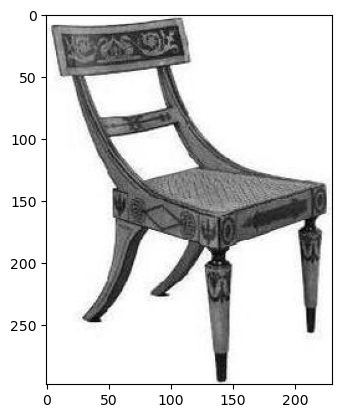

In [22]:
# 이미지 확인하기
import matplotlib.pyplot as plt

plt.imshow(chairData[0].reshape(298, 230), cmap='gray')
plt.show()

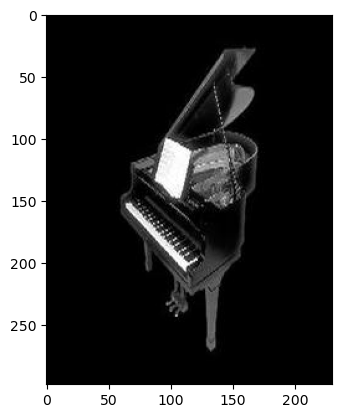

In [23]:
# 이미지 확인하기
import matplotlib.pyplot as plt

plt.imshow(pianoData[0].reshape(298, 230), cmap='gray')
plt.show()

##### laptop Image를 numpy로 변경하기

In [24]:
laptopData = np.zeros(
    number_of_data * img_width_size * img_height_size,
    dtype=np.int32
).reshape(
    number_of_data,
    img_height_size,
    img_width_size
)

In [25]:
i = 0
for file in sorted(glob.glob("../Data/laptopNew/*.jpg")):
    img = np.array(Image.open(file), dtype=np.int32)
    laptopData[i,:,:] = img
    i+=1

In [18]:
laptopData.shape

(60, 298, 230)

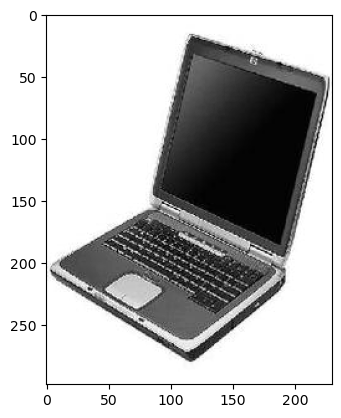

In [26]:
# 이미지 확인하기
plt.imshow(laptopData[0].reshape(298, 230), cmap='gray')
plt.show()

----
#### numpy data를 train data로 합치기

In [27]:
train = np.concatenate(
    [pianoData, chairData, laptopData]
)
train.shape

(180, 298, 230)

#### target data

In [29]:
target = np.concatenate(
    [np.zeros(60), np.ones(60),np.full((60),2)]
)
target.shape

(180,)

In [30]:
target

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [48]:
from sklearn.model_selection import train_test_split

trainData,  testData, trainTarget, testTarget = train_test_split(train, target, test_size=0.2, random_state=42)

In [47]:
print(trainData.shape, trainTarget.shape, testData.shape, testTarget.shape)

(144, 298, 230) (36, 298, 230) (144,) (36,)


In [49]:

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

model = Sequential()
model.add(Conv2D(32, kernel_size=3, padding='same', activation='relu', Input =(298,230,1) ))
model.add(MaxPool2D(2))
model.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(2))

model.add(Flatten())

model.add(Dense(100, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(3,activation='softmax'))

model.compile(optimzer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# mc = ModelCheckpoint()
# es = EarlyStopping( patience= 5, restore_best_weights=True)

history = model.fit(trainData,trainTarget, epochs= 10, validation_data=(testData, testTarget))


ValueError: Unrecognized keyword arguments passed to Conv2D: {'Input': (298, 230, 1)}

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import tensorflow as tf


model = Sequential()

model.add(Input ( shape=(298, 230, 1) ))
model.add(Conv2D(32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(2))
model.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(2))

model.add(Flatten())

model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))  

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


mc = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)
es = EarlyStopping(patience=5, restore_best_weights=True)


history = model.fit(
    trainData, trainTarget,
    epochs=10,
    validation_data=(testData, testTarget),
    callbacks=[mc, es]
)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 641ms/step - accuracy: 0.3241 - loss: 2235.4016

5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.3264 - loss: 2371.6260 - val_accuracy: 0.3333 - val_loss: 803.9906
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 644ms/step - accuracy: 0.4082 - loss: 916.4978

5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 965ms/step - accuracy: 0.4028 - loss: 716.7953 - val_accuracy: 0.3056 - val_loss: 155.7001
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 621ms/step - accuracy: 0.3910 - loss: 189.3510

5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 933ms/step - accuracy: 0.4444 - loss: 139.7620 - val_accuracy: 0.6111 - val_loss: 5.2992
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 646ms/step - accuracy: 0.7615 - loss: 3.2472

5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 958ms/step - accuracy: 0.7708 - loss: 2.5610 - val_accuracy: 0.7778 - val_loss: 3.1758
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 614ms/step - accuracy: 0.8729 - loss: 1.0005

5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 925ms/step - accuracy: 0.8958 - loss: 0.8403 - val_accuracy: 0.7222 - val_loss: 2.2214
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 634ms/step - accuracy: 0.9286 - loss: 0.2085

5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 942ms/step - accuracy: 0.9167 - loss: 0.2467 - val_accuracy: 0.6944 - val_loss: 1.5376
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 621ms/step - accuracy: 0.8821 - loss: 1.0875

5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 945ms/step - accuracy: 0.9028 - loss: 0.6909 - val_accuracy: 0.6944 - val_loss: 1.2908
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 633ms/step - accuracy: 0.9245 - loss: 0.2055

5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 966ms/step - accuracy: 0.9375 - loss: 0.2095 - val_accuracy: 0.6667 - val_loss: 1.1617
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 625ms/step - accuracy: 0.9694 - loss: 0.1645

5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 940ms/step - accuracy: 0.9722 - loss: 0.1497 - val_accuracy: 0.6667 - val_loss: 1.1467
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 633ms/step - accuracy: 0.9651 - loss: 0.1941

5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 950ms/step - accuracy: 0.9583 - loss: 0.1821 - val_accuracy: 0.6667 - val_loss: 1.1170


In [61]:
model.evaluate(trainData, trainTarget)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - accuracy: 0.9931 - loss: 0.0488


[0.04876794293522835, 0.9930555820465088]

In [62]:
model.evaluate(testData, testTarget)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.6667 - loss: 1.1170 


[1.1170176267623901, 0.6666666865348816]

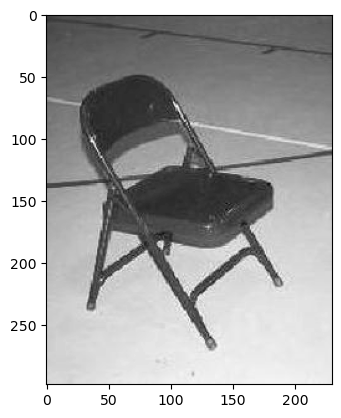

In [78]:
plt.imshow(testData[20].reshape(298, 230), cmap='gray')
plt.show()

In [ ]:
import numpy as np

answer =['피아노','의자','랩탑']
predictions = model.predict(testData[20:21])


predicted_class = np.argmax(predictions, axis=1)
print("예측된 클래스:", predicted_class[0])
print("클래스별 확률:", predictions[0])
print("예측값:", answer[np.argmax(predictions[0])])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
예측된 클래스: 1
클래스별 확률: [0.09381033 0.5614038  0.34478587]
예측값: 의자


array([[0.09381033, 0.5614038 , 0.34478587]], dtype=float32)

In [ ]:
import numpy as np
from  PIL import Image

In [ ]:
# 전체 사진중 쵲대 해상도 찾기
dirNames = ['Aiden','Andrew','Cathy']

In [96]:
widthRatio = []
heightRatio = []

for name in dirNames:
    for file in sorted(glob.glob("../Data/Face/%s/*.jpg"%name)):
        img = np.array(Image.open(file), dtype=np.int32)
        # print(img)
        widthRatio.append(img.shape[1])
        heightRatio.append(img.shape[0])

In [89]:
print("너비 최대 해삳오: ", np.max(widthRatio))
print("높 최대 해삳오: ", np.max(heightRatio))

너비 최대 해삳오:  299
높 최대 해삳오:  381


In [100]:
# 해상도의 크기를 400*300 
# 전체 사진을 400*300의 고정 크기로 검은색을 배경으로 맞추기
for name in dirNames:
    fileCount = 0
    for file in sorted(glob.glob("../Data/Face/%s/*.jpg"%name)):
        img = Image.open(file)
        img = img.convert('L')
        imgArray = np.array(img)
        # print(imgArray)

        imgDummy = np.zeros(400*300).reshape(400,300)
        rowNum = ( 400- imgArray.shape[0])/2
        colNum = ( 300 -imgArray.shape[1])/2

        k = 0
        for i in range(int(rowNum), int(rowNum) + imgArray.shape[0]):
            l=0 
            for j in range(int(colNum), int(colNum) + imgArray.shape[1]):
                imgDummy[i,j] = imgArray[k,l]
                l +=1
            k+=1    

        img2 = Image.fromarray(imgDummy.astype('uint8'))
        img2.save("../Data/FaceGray/%s/image_%04d.jpg"%(name, fileCount),"JPEG")
        fileCount +=1
               

In [102]:
# 사진들을 numpy배열로 Train data 만들기
number_of_data = 18 * len(dirNames)
img_width_size = 300
img_height_size = 400


In [105]:
train = np.zeros( 
    number_of_data * img_width_size* img_height_size, dtype=np.int32
).reshape(number_of_data, img_height_size, img_width_size)

i = 0

for name in dirNames:
    for file in sorted(glob.glob("../Data/FaceGray/%s/*.jpg"%name)):
        # print(file)
        img = np.array(Image.open(file), dtype=np.int32)
        train[i,:,:] = img
        i+=1

In [106]:
train.shape

(54, 400, 300)

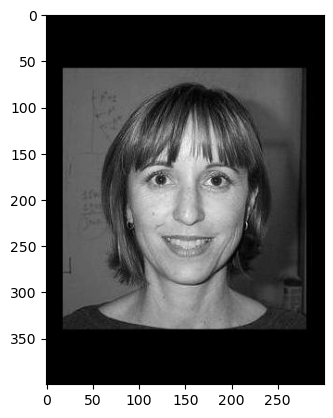

In [107]:
import matplotlib.pyplot as plt
plt.imshow(train[40].reshape(400,300),cmap='gray')
plt.show()

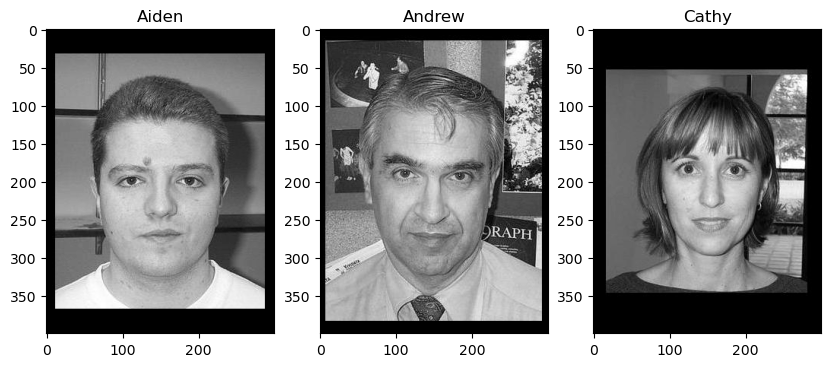

In [ ]:
plt.figure(figsize=(10,10))
orderNo = list(range(0,len(dirNames)*18, 18))
# orderNo

for i in range(1, len(dirNames)+1):
    plt.subplot(1,len(dirNames), i)
    plt.imshow(train[orderNo[i-1]].reshape(400,300) , cmap='gray')
    plt.title(dirNames[i-1])

In [114]:
# target data만들기
target = np.concatenate(
    [np.zeros(18), np.ones(18), np.full((18),2)]
)
target

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2.])

In [122]:
# 정규화
train = train.reshape(-1,400,300,1) / 255.0

In [123]:
# train, test sep
from sklearn.model_selection import train_test_split

trainData, testData , trainTarget, testTarget = train_test_split(train, target, test_size=0.2, random_state=42)

In [124]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import tensorflow as tf


model = Sequential()

model.add(Input ( shape=(400, 300, 1) ))
model.add(Conv2D(32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(2))
model.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(2))

model.add(Flatten())

model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))  

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


mc = ModelCheckpoint('../Data/best_model0803.keras', monitor='val_loss', save_best_only=True)
es = EarlyStopping(patience=5, restore_best_weights=True)


history = model.fit(
    trainData, trainTarget,
    epochs=10,
    validation_data=(testData, testTarget),
    callbacks=[mc, es]
)


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 4s/step - accuracy: 0.3721 - loss: 4.8593 - val_accuracy: 0.1818 - val_loss: 22.3594
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 4s/step - accuracy: 0.3953 - loss: 10.8144 - val_accuracy: 0.6364 - val_loss: 1.2116
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 4s/step - accuracy: 0.6977 - loss: 3.0725 - val_accuracy: 1.0000 - val_loss: 0.0554
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 733ms/step - accuracy: 0.7442 - loss: 0.9765 - val_accuracy: 0.9091 - val_loss: 0.2018
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 760ms/step - accuracy: 0.9070 - loss: 0.3455 - val_accuracy: 0.8182 - val_loss: 1.1447
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 764ms/step - accuracy: 0.9302 - loss: 0.1684 - val_accuracy: 0.6364 - val_loss: 1.5263
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 772ms/step - accuracy: 0.9535 - loss: 0.2987 - val_accuracy: 0.8182 - val_loss: 0.6648
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 744ms/step - accuracy: 0.9302 - loss: 0.2061 - val_accuracy: 0.9091 - val_loss: 0.3431

In [125]:
model.evaluate(trainData, trainTarget)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.8605 - loss: 0.7155


[0.715511679649353, 0.8604651093482971]

In [126]:
model.evaluate(testData, testTarget)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 1.0000 - loss: 0.0554


[0.05542163550853729, 1.0]

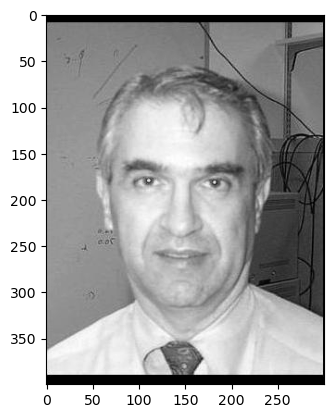

In [128]:
# 확인
plt.imshow(testData[0].reshape(400,300),cmap='gray')
plt.show()

In [130]:
prediction  = model.predict(testData[0:1])
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


array([[9.6614491e-03, 9.9031699e-01, 2.1555787e-05]], dtype=float32)

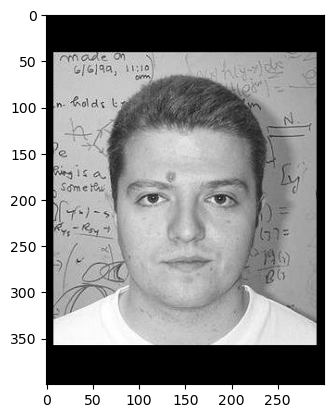

In [133]:
# 확인
plt.imshow(testData[10].reshape(400,300),cmap='gray')
plt.show()

In [134]:
pred  = model.predict(testData[10:11])
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


array([[9.9950373e-01, 3.6518919e-08, 4.9627788e-04]], dtype=float32)